In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA

np.random.seed(42)

## Reading the serie

In [32]:
df = pd.read_csv('/kaggle/input/complete-load-data/Total_Load.csv')
df.head(24)

,Time,Load
0,0,0.000003
1,3600,2.184715
2,7200,1.916824
3,10800,1.785713
4,14400,1.732656
5,18000,2.966157
6,21600,3.967359
7,25200,5.078456
8,28800,6.176139
9,32400,9.050642


In [35]:
start_date = "2022-06-07 00:00:00"
df['Time'] = pd.date_range(start="2022-06-07 00:00:00", periods=len(df), freq='h')
ts_data = pd.Series(df['Load'].values, index=df['Time'])

In [43]:
ts_data.index = pd.to_datetime(ts_data.index)
ts_data.index.freq = 'h' 

In [36]:
df

,Time,Load
0,2022-06-07 00:00:00,0.000003
1,2022-06-07 01:00:00,2.184715
2,2022-06-07 02:00:00,1.916824
3,2022-06-07 03:00:00,1.785713
4,2022-06-07 04:00:00,1.732656
...,...,...
5248,2023-01-11 16:00:00,13.943496
5249,2023-01-11 17:00:00,16.146784
5250,2023-01-11 18:00:00,15.115618
5251,2023-01-11 19:00:00,14.998644


<Axes: xlabel='Time'>

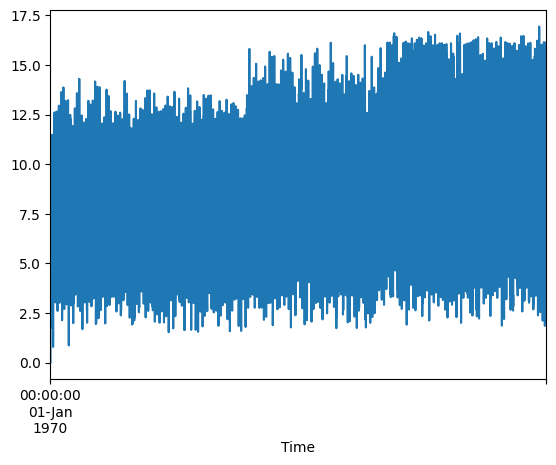

In [4]:
ts_data.plot()

# 1) Visualisation

a) observation

Text(0, 0.5, 'Value')

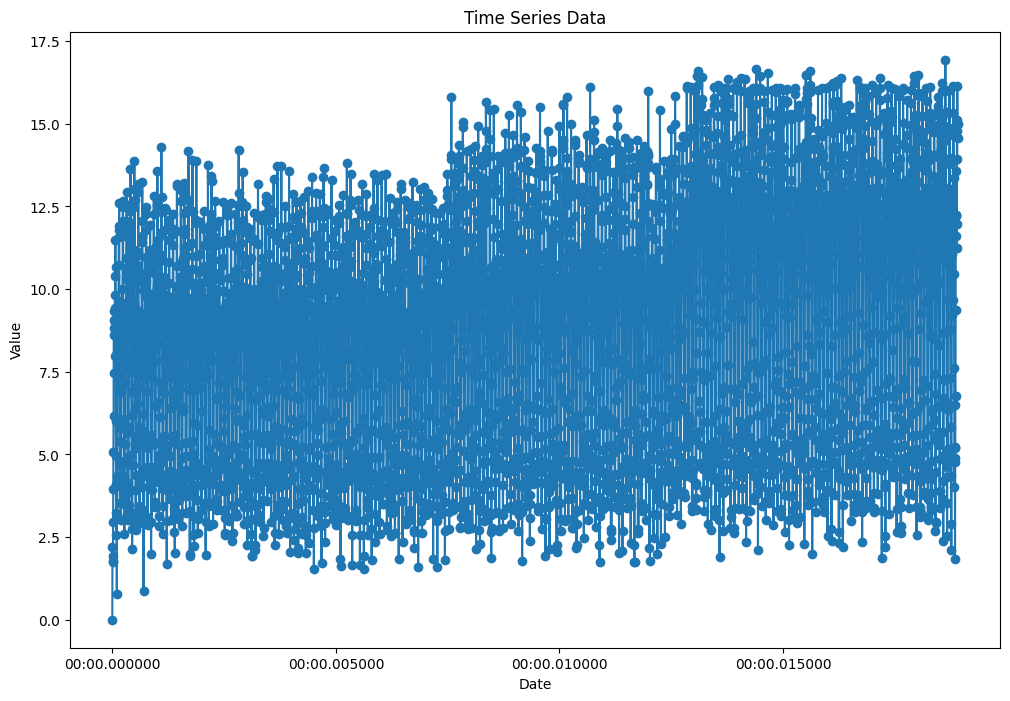

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(ts_data, marker='o', linestyle='-')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')

b) Descriptive statistics

In [6]:
ts_data.describe()

count    5253.000000
mean        8.738243
std         3.799950
min         0.000003
25%         5.077551
50%         9.118970
75%        11.867601
max        16.936654
dtype: float64

With statsmodels

In [7]:
from statsmodels.stats.descriptivestats import describe

print(describe(ts_data))

                             0
nobs              5.253000e+03
missing           0.000000e+00
mean              8.738243e+00
std_err           5.242932e-02
upper_ci          8.841002e+00
lower_ci          8.635483e+00
std               3.799950e+00
iqr               6.790050e+00
iqr_normal        5.033472e+00
mad               3.304502e+00
mad_normal        4.141579e+00
coef_var          4.348644e-01
range             1.693665e+01
max               1.693665e+01
min               3.057630e-06
skew              3.766294e-02
kurtosis          1.842769e+00
jarque_bera       2.943555e+02
jarque_bera_pval  1.206493e-64
mode              3.057630e-06
mode_freq         1.903674e-04
median            9.118970e+00
1%                2.161709e+00
5%                3.139719e+00
10%               3.787934e+00
25%               5.077551e+00
50%               9.118970e+00
75%               1.186760e+01
90%               1.379377e+01
95%               1.480581e+01
99%               1.609372e+01


# 2) Stationarity tests

## 2-1) is the time serie stationary?

### 2-1-1) Non differecied TS

<div style="background-color: red; padding: 10px; border-left: 5px solid #c62828;">
  <strong>Warning:</strong> H0 and H1 of ADF/PP are inversed with those of KPSS
</div>

### a) ADF

In [8]:
a = adfuller(ts_data)
print("The test statistic: ", a[0])
print("pvalue: ", a[1])
for key, value in a[4].items():
    print("Critical values for the test statistic at the ",key,": ",value)

The test statistic:  -4.564574220596554
pvalue:  0.00015004817372350245
Critical values for the test statistic at the  1% :  -3.4316035963290337
Critical values for the test statistic at the  5% :  -2.862093959137102
Critical values for the test statistic at the  10% :  -2.5670648722409877


- All the comparaison done for significance level 0.05 (5%)
    - pvalue = 0.0001 $ \leq $ significance level = 0.05
    - test statistic = -4.56 $ \leq $ critical value (%5) = -2.86
- We reject the $H_0$, so the time serie is stationary

b) KPSS

In [9]:
b = kpss(ts_data)
print("The test statistic: ", b[0])
print("pvalue: ", b[1])
for key, value in b[3].items():
    print("Critical values for the test statistic at the ",key,": ",value)

The test statistic:  9.147721163668463
pvalue:  0.01
Critical values for the test statistic at the  10% :  0.347
Critical values for the test statistic at the  5% :  0.463
Critical values for the test statistic at the  2.5% :  0.574
Critical values for the test statistic at the  1% :  0.739


/tmp/ipykernel_35/3987708660.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  b = kpss(ts_data)


- All the comparaison done for significance level 0.05 (5%)
    - pvalue = 0.01 $ \leq $ significance level = 0.05
    - test statistic = 9.14 > critical value (5%) = 0.463
- We reject the $H_0$, so the time serie is not stationary

c) PP

In [10]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 15.0 MB/s eta 0:00:00 0:00:01


In [11]:
from arch.unitroot import PhillipsPerron as pp

pp(ts_data)

Test Statistic,-13.745
P-value,0.000
Lags,33


- All the comparaison done for significance level 0.05 (5%)
    - pvalue = 0 $ \leq $ significance level = 0.05
    - test statistic = -13.74 $ \leq $ critical value (5%) = -2.89
- We reject the $H_0$, so the time serie is stationary

### 2-1-2) Differecied TS

<Axes: xlabel='Time'>

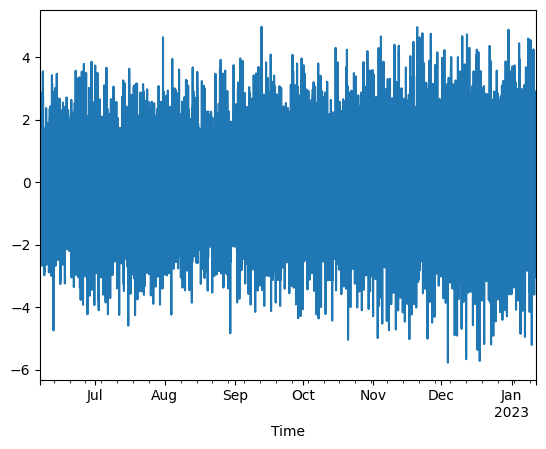

In [40]:
diff_ts = ts_data.diff().dropna()
diff_ts.plot()

a) adf

In [14]:
a = adfuller(diff_ts)
print("The test statistic: ", a[0])
print("pvalue: ", a[1])
for key, value in a[4].items():
    print("Critical values for the test statistic at the ",key,": ",value)

The test statistic:  -15.456180002393378
pvalue:  2.743399854479624e-28
Critical values for the test statistic at the  1% :  -3.4316035963290337
Critical values for the test statistic at the  5% :  -2.862093959137102
Critical values for the test statistic at the  10% :  -2.5670648722409877


- All the comparaison done for significance level 0.05 (5%)
    - pvalue = 2.74e-28 $ \leq $ significance level = 0.05
    - test statistic = -15.45 $ \leq $ critical value (%5) = -2.86
- We reject the $H_0$, so the time serie is stationary

b) KPSS

In [15]:
b = kpss(diff_ts)
print("The test statistic: ", b[0])
print("pvalue: ", b[1])
for key, value in b[3].items():
    print("Critical values for the test statistic at the ",key,": ",value)

The test statistic:  0.0010465252763352476
pvalue:  0.1
Critical values for the test statistic at the  10% :  0.347
Critical values for the test statistic at the  5% :  0.463
Critical values for the test statistic at the  2.5% :  0.574
Critical values for the test statistic at the  1% :  0.739


/tmp/ipykernel_35/1208733425.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  b = kpss(diff_ts)


- All the comparaison done for significance level 0.05 (5%)
    - pvalue = 0.1 $ \geq $ significance level = 0.05
    - test statistic = 0.001 < critical value (5%) = 0.463
- We accept the $H_0$, so the time serie is stationary

c) PP

In [16]:
!pip install arch

In [17]:
from arch.unitroot import PhillipsPerron as pp

pp(diff_ts)

Test Statistic,-68.329
P-value,0.000
Lags,33


- All the comparaison done for significance level 0.05 (5%)
    - pvalue = 0 $ \leq $ significance level = 0.05
    - test statistic = 	-68.32 $ \leq $ critical value (5%) = -2.86
- We reject the $H_0$, so the time serie is stationary

# Conclusion:
- *For non-differentiated time serie* : while the ADF and PP tests indicated that the time series is stationary, the KPSS test suggested otherwise. Additionally, visual inspection reveals inconsistencies—when analyzing different time windows, the mean appears to vary, further challenging the assumption of stationarity.
- *For differentiated time serie* : All the tests confirm that the serie is stationary.

# 3) Analysis of the time structure

## 3-1) ACF and PACF plots

### 3-1-1) non diff

Text(0.5, 0.98, 'ACF and PACF Plots of original time series')

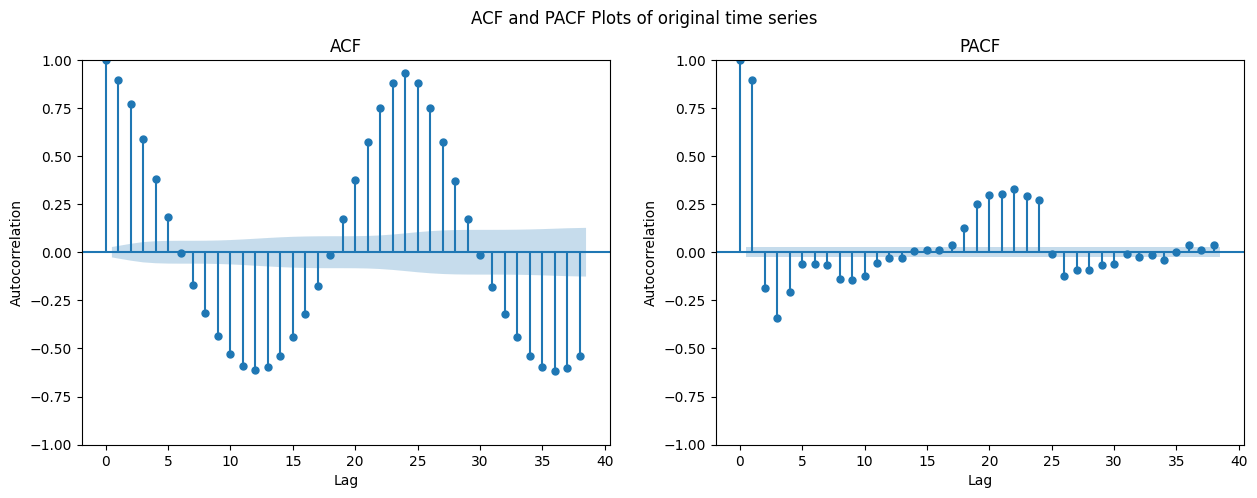

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, ax = plt.subplots(1,2, figsize=(15,5))


plot_acf(ts_data, ax = ax[0])
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('Autocorrelation')
ax[0].set_title("ACF")


plot_pacf(ts_data, ax = ax[1])
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Autocorrelation')
ax[1].set_title("PACF")

fig.suptitle("ACF and PACF Plots of original time series")

# For the non diff TS
- ACF plot damped sin function:
    - So it is a AR(p) model
- PACF plot:
    - We can take many values but will choose the last more significant drop 31
- Our time serie is seasonal by 24 hours:
    - PACF is not seasonal so P = 0
    - ACF is seasonal at s =24 at lag Q = 1
    - seasonality period s = 24
    - No need for seasonal differencing D = 0
- Conclusion:
    - we can use SARIMAX(data, order=(31, 0, 0), seasonal_order=(0, 0, 1, 24))

### b) diff TS 

Text(0.5, 0.98, 'ACF and PACF Plots of diff time series')

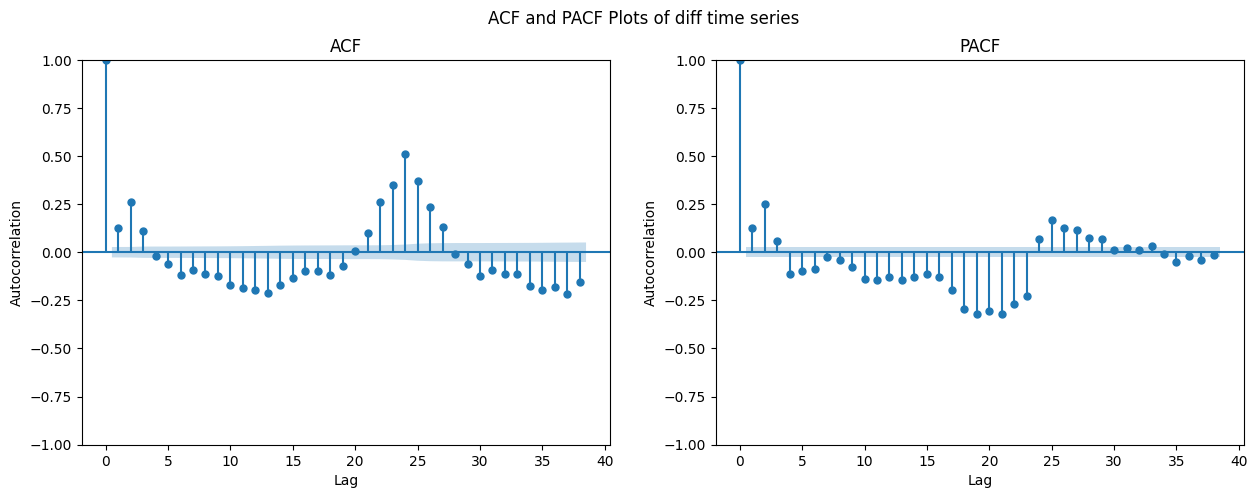

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, ax = plt.subplots(1,2, figsize=(15,5))


plot_acf(diff_ts, ax = ax[0])
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('Autocorrelation')
ax[0].set_title("ACF")


plot_pacf(diff_ts, ax = ax[1])
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Autocorrelation')
ax[1].set_title("PACF")

fig.suptitle("ACF and PACF Plots of diff time series")

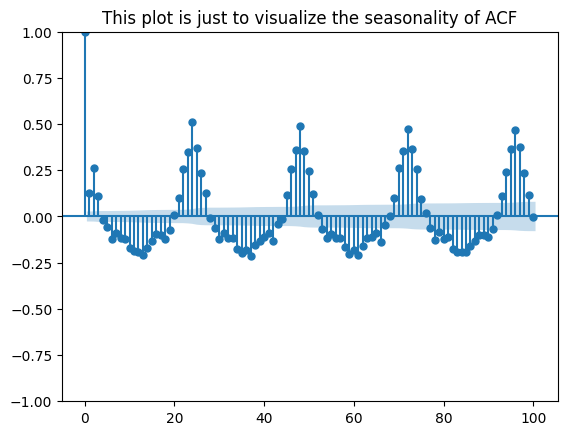

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


sm.graphics.tsa.plot_acf(diff_ts, lags=100)

plt.title("This plot is just to visualize the seasonality of ACF")
plt.show()


# For the diff TS
- ACF plot damped sin function:
    - So it is a AR(p) model
- PACF plot:
    - We can take many value but will choose the last significant drop 29
- Our time serie is seasonal by 24 hours:
    - PACF is not seasonal so P = 0
    - ACF is seasonal at s =24 at lag Q = 1
    - seasonality period s = 24
    - No need for seasonal differencing D = 0
- Conclusion:
    - we can use SARIMAX(data, order=(29, 0, 0), seasonal_order=(0, 0, 1, 24))

## 3-2) Decomposition

a) additive model non diff

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

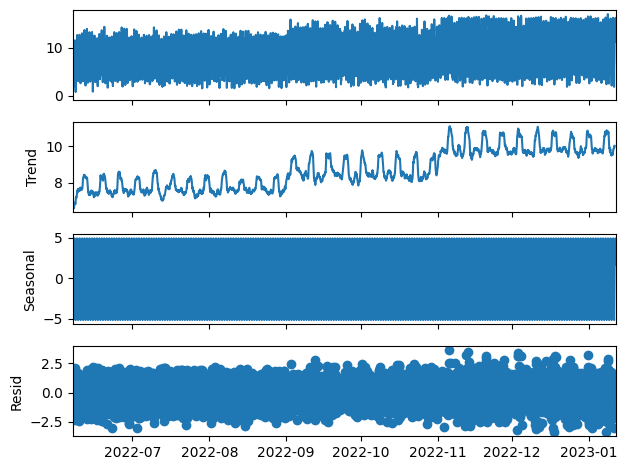

In [38]:
decom_plot = seasonal_decompose(ts_data, model='additive')
decom_plot.plot()
plt.show()


b) additive model diff

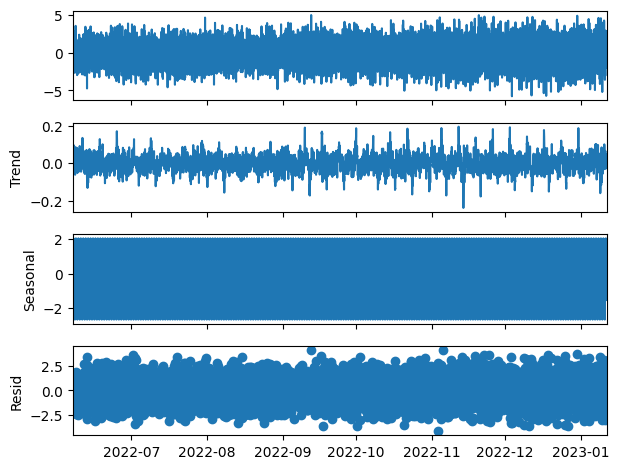

In [41]:
decom_plot = seasonal_decompose(diff_ts, model='additive')
decom_plot.plot()
plt.show()


# 4) Modelisation

## 4.1- ARMA Model with the concluded params from ACF and PACF plot

a) non diff ts

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                       
Dep. Variable:                                     y   No. Observations:                 5253
Model:             SARIMAX(31, 0, 0)x(0, 0, [1], 24)   Log Likelihood               -7546.871
Date:                               Fri, 16 May 2025   AIC                          15159.742
Time:                                       17:53:47   BIC                          15376.438
Sample:                                   06-07-2022   HQIC                         15235.501
                                        - 01-11-2023                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2575      0.013     19.133      0.000       0.231       0.284
ar.L2      

Text(0.5, 1.0, 'SARIMA Model Predicitons (with get_forecast)')

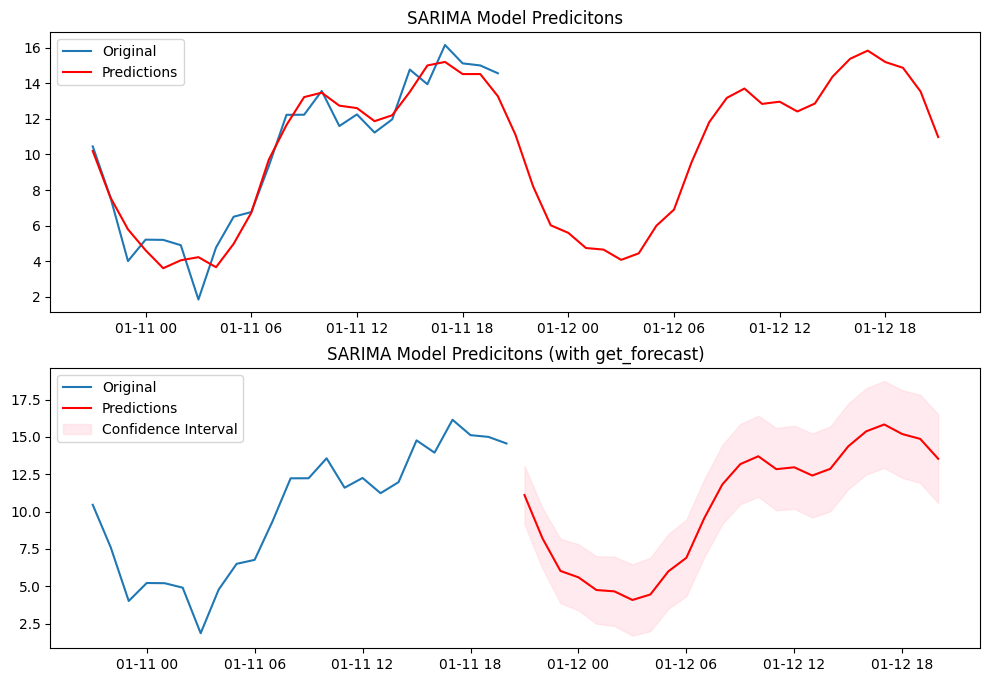

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model= SARIMAX(ts_data, order=(31, 0, 0), seasonal_order=(0, 0, 1, 24))
arma = model.fit()

print(arma.summary())

#1st method of prediction:
predictions = arma.predict(start=len(ts_data)-24, end=len(ts_data)+24) # Example: predict last 24 values and 24 future values

#2nd method of prediction:
forecast = arma.get_forecast(steps=24)
forecast_ci = forecast.conf_int()


fig, ax = plt.subplots(2,1, figsize=(12, 8))




ax[0].plot(ts_data[-24:], label='Original')
ax[0].plot(predictions, color='red', label='Predictions')
ax[0].legend()
ax[0].set_title("SARIMA Model Predicitons")



ax[1].plot(ts_data[-24:], label='Original')
ax[1].plot(forecast.predicted_mean, color='red', label='Predictions')
ax[1].fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
ax[1].legend()
ax[1].set_title("SARIMA Model Predicitons (with get_forecast)")


b) diff ts

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                       
Dep. Variable:                                     y   No. Observations:                 5252
Model:             SARIMAX(24, 0, 0)x(0, 0, [1], 24)   Log Likelihood               -7647.162
Date:                               Fri, 16 May 2025   AIC                          15346.323
Time:                                       17:54:37   BIC                          15517.049
Sample:                                   06-07-2022   HQIC                         15406.011
                                        - 01-11-2023                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6551      0.013    -51.763      0.000      -0.680      -0.630
ar.L2      

Text(0.5, 1.0, 'SARIMA Model Predicitons (with get_forecast)')

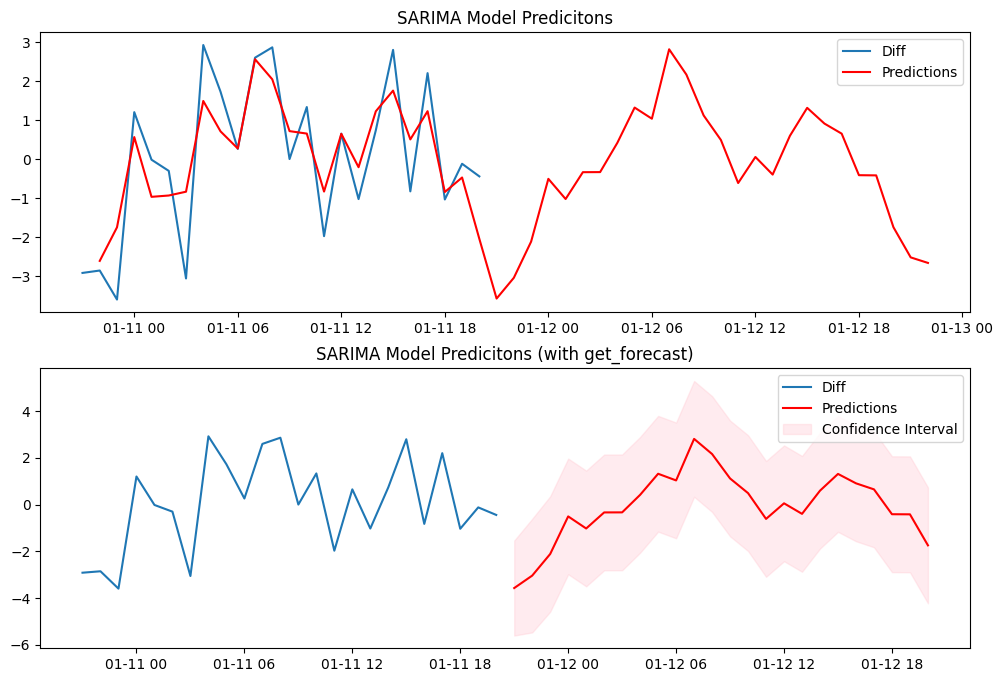

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model= SARIMAX(diff_ts, order=(24, 0, 0), seasonal_order=(0, 0, 1, 24))
arma = model.fit()

print(arma.summary())

#1st method of prediction:
predictions = arma.predict(start=len(ts_data)-24, end=len(ts_data)+24) # Example: predict last 24 values and 24 future values

#2nd method of prediction:
forecast = arma.get_forecast(steps=24)
forecast_ci = forecast.conf_int()


fig, ax = plt.subplots(2,1, figsize=(12, 8))




ax[0].plot(diff_ts[-24:], label='Diff')
ax[0].plot(predictions, color='red', label='Predictions')
ax[0].legend()
ax[0].set_title("SARIMA Model Predicitons")



ax[1].plot(diff_ts[-24:], label='Diff')
ax[1].plot(forecast.predicted_mean, color='red', label='Predictions')
ax[1].fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
ax[1].legend()
ax[1].set_title("SARIMA Model Predicitons (with get_forecast)")


## 4.2) Searching for the best ARIMA params

In [47]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.7 MB/s eta 0:00:0000:010:01


In [48]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import numpy as np
import pmdarima as pm

best_model = pm.auto_arima(ts_data,
                           seasonal=True,
                           m=24,
                           stationary=False,         
                           start_P=0,       
                           max_P=1,                    
                           start_Q=0,      
                           max_Q=1,         
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)   

print(best_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[24] intercept   : AIC=20045.814, Time=1.58 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=20590.342, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=18263.875, Time=4.22 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=19611.426, Time=4.12 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=20588.356, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=20508.581, Time=0.14 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=22.75 sec
 ARIMA(1,1,0)(0,0,1)[24] intercept   : AIC=19596.520, Time=4.00 sec
 ARIMA(0,1,0)(1,0,0)[24] intercept   : AIC=19006.016, Time=3.61 sec
 ARIMA(2,1,0)(1,0,0)[24] intercept   : AIC=18100.776, Time=7.37 sec
 ARIMA(2,1,0)(0,0,0)[24] intercept   : AIC=20167.488, Time=0.30 sec
 ARIMA(2,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=28.96 sec
 ARIMA(2,1,0)(0,0,1)[24] intercept   : AIC=19439.382, Time=4.74 sec
 ARIMA(3,1,0)(1,0,0)[24] intercept   : AIC=inf, Time=9.05 sec
 ARIMA(2,1,1)(1,0,0)[

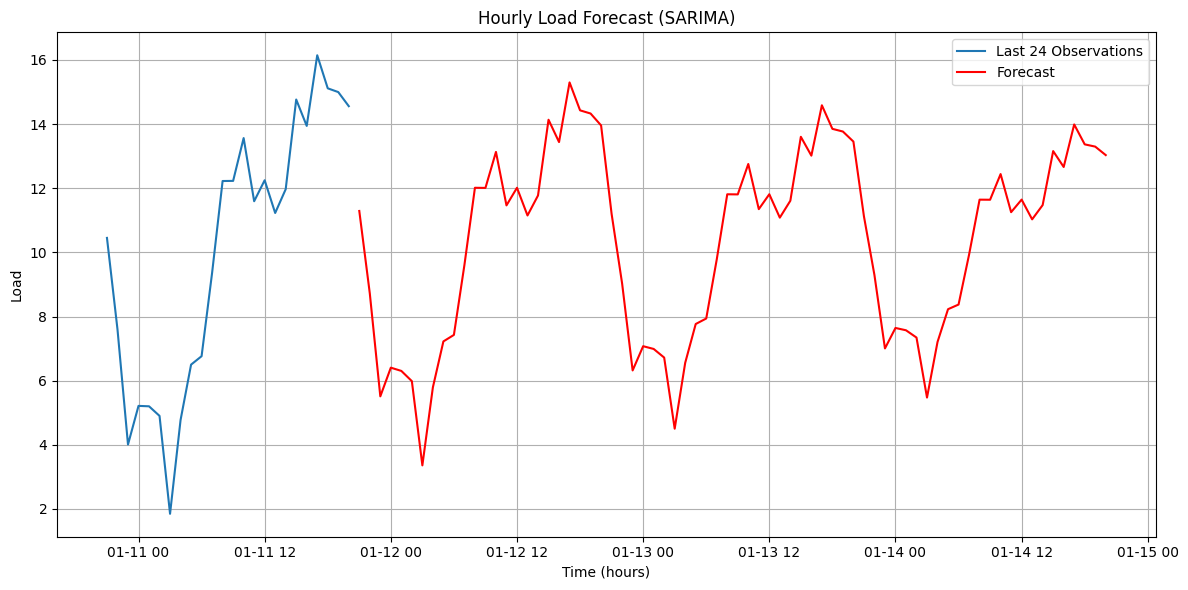

In [56]:
predictions = best_model.predict(n_periods=72)

plt.figure(figsize=(12, 6))
plt.plot(ts_data[-24:], label='Last 24 Observations')
plt.plot(predictions, color='red', label='Forecast')
plt.legend()
plt.title("Hourly Load Forecast (SARIMA)")
plt.xlabel("Time (hours)")
plt.ylabel("Load")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5) Validation

## 5.1) Errors Analysis

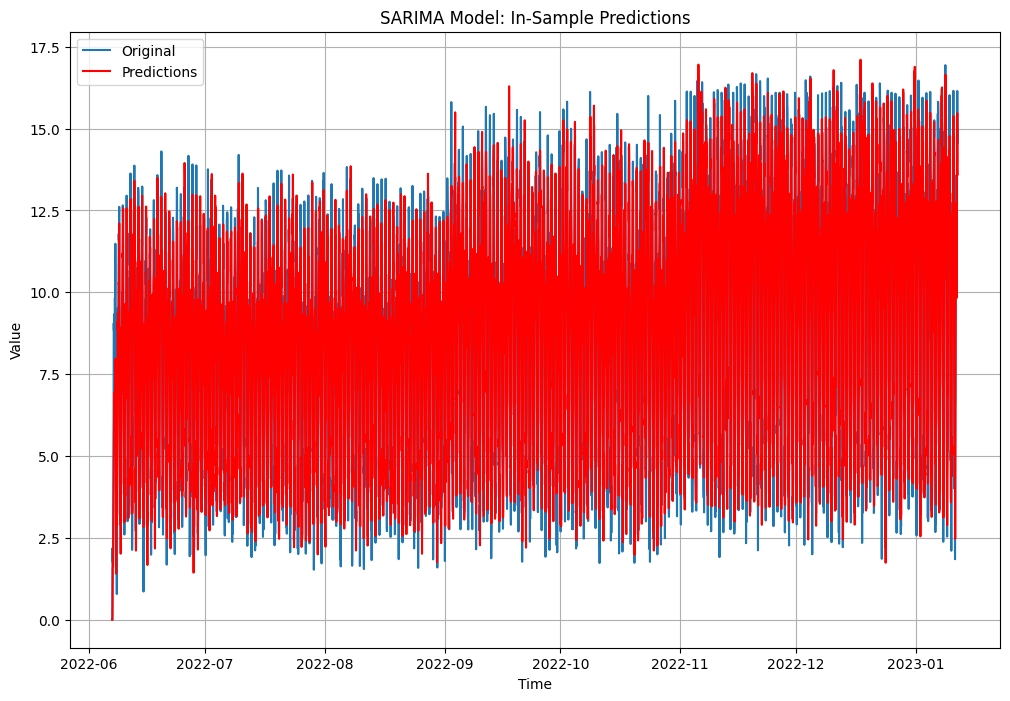

MAE: 1.017
MSE: 1.632
RMSE: 1.277
R2: 0.887


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predictions = best_model.predict_in_sample()

plt.figure(figsize=(12, 8))
plt.plot(ts_data, label='Original')
plt.plot(predictions, color='red', label='Predictions')
plt.legend()
plt.title("SARIMA Model: In-Sample Predictions")
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

mae = mean_absolute_error(ts_data, predictions)
mse = mean_squared_error(ts_data, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(ts_data, predictions)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2: {r2:.3f}")


## 5.2) Residual Analysis

## a) Risiduals

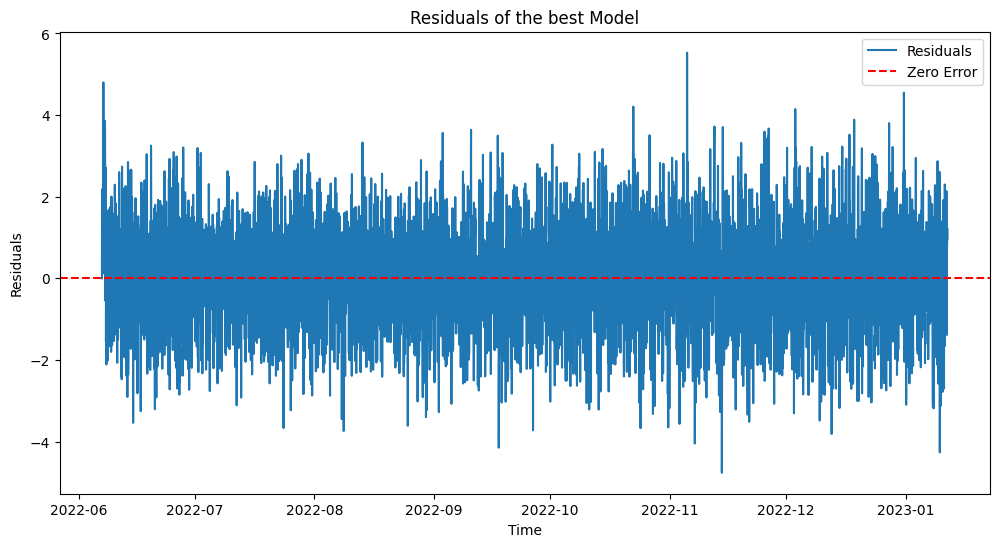

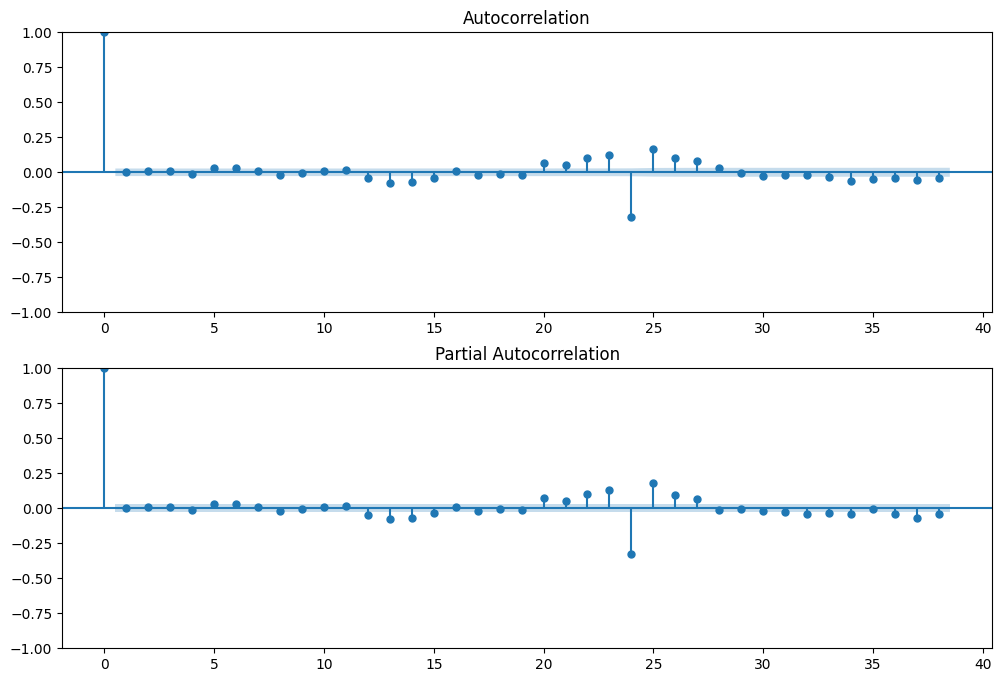

In [51]:

predictions = best_model.predict_in_sample()
residuals = best_model.resid() # residuals = ts_data - predictions


plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Error')
plt.legend()
plt.title("Residuals of the best Model")
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(residuals, ax=ax1)
plot_pacf(residuals, ax=ax2)
plt.show()

## b) making sure that the risidual is a white noise

In [52]:
from arch.unitroot import PhillipsPerron as pp

# 1. ADF Test
adf_result = adfuller(residuals)
print("ADF Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values: {adf_result[4]}")
print()

# 2. KPSS Test
kpss_result = kpss(residuals, regression='c')  # 'c' for constant, 'ct' for constant and trend
print("KPSS Test Results:")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print(f"Critical Values: {kpss_result[3]}")
print()

# 3. PP Test
pp_result = pp(residuals)
print("PP Test Results:")
print(f"PP Statistic: {pp_result.stat}")
print(f"p-value: {pp_result.pvalue}")
print(f"Critical Values: {pp_result.critical_values}")

ADF Test Results:
ADF Statistic: -13.128785143335168
p-value: 1.5097294197208912e-24
Critical Values: {'1%': -3.4316035963290337, '5%': -2.862093959137102, '10%': -2.5670648722409877}

KPSS Test Results:
KPSS Statistic: 0.06679259286774752
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

PP Test Results:
PP Statistic: -72.41127999166874
p-value: 0.0
Critical Values: {'1%': -3.4315957157264836, '5%': -2.8620904774601432, '10%': -2.567063018820234}


/tmp/ipykernel_35/3210809759.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(residuals, regression='c')  # 'c' for constant, 'ct' for constant and trend


# The residuals of the best SARIMA model are stationary, fluctuate around 0, and have autocorrelation (Look at ACF/PACF) to make sure we'll test another Residual Analysis method, then they can be considered white noise.

In [53]:
from statsmodels.stats.diagnostic import acorr_ljungbox

print(acorr_ljungbox(residuals, return_df=True))


      lb_stat  lb_pvalue
1    0.004315   0.947625
2    0.544342   0.761724
3    1.210377   0.750517
4    2.009101   0.734085
5    7.637942   0.177351
6   12.465196   0.052360
7   13.304266   0.065033
8   14.770756   0.063759
9   14.936032   0.092708
10  15.197939   0.125010


H_0: Residuals are independently distributed.

H_1: Residuals are not independently distributed and exhibit serial correlation.

This shows the p-values of the first 10 lags. They are all below the significance level of 0.05, therefore we reject the null hypothesis of no autocorrelation. Thus, there is correlation present in our residuals that we need to revisit when re-fitting the model.

# 6) Predictions of futures

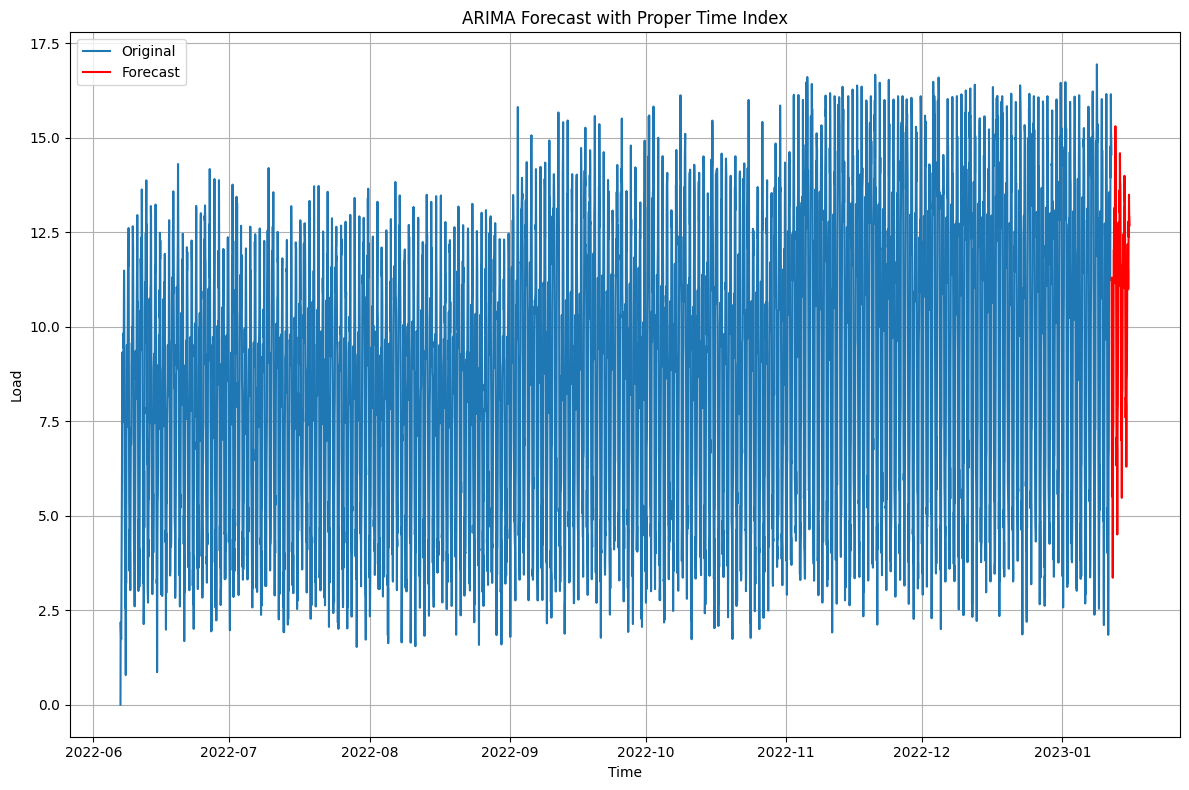

In [54]:
import pandas as pd

future_steps=96
last_timestamp = ts_data.index[-1]
freq = ts_data.index.inferred_freq or 'H'

forecast_index = pd.date_range(start=last_timestamp + pd.Timedelta(1, unit=freq[0]), periods=future_steps, freq=freq)

forecast = best_model.predict(n_periods=future_steps)

plt.figure(figsize=(12, 8))
plt.plot(ts_data, label='Original')
plt.plot(forecast_index, forecast, color='red', label='Forecast')
plt.title("ARIMA Forecast with Proper Time Index")
plt.xlabel("Time")
plt.ylabel("Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
